# Respuestas Miniproyecto 2
                                                                                    Ricardo Manriquez 17.002.046-4
 ## Caso 01 - Video Conferencia
El año 2020 las plataformas de videoconferencia presentaron un aumento masivo en su uso y flujo de usuarios.

### Se requiere:
Usa este dataset videoconferencia.csv y la librería seaborn para visualizar esta información como un mapa de calor, donde las columnas corresponden a las semanas, las filas a los días de la semana, y cada celda se colorea como codificación del valor de horas de llamadas correspondiente. 

###  A. Importar librerías requeridas

En la siguiente casilla importaremos los módulos necesarias para crear la visualizacion requerida.

In [375]:
# -*- coding: utf-8 -*-
# Importamos el módulo seaborn abreviado a sns
import seaborn as sns

# Importamos el módulo pyploy de matplotlib abreviado a plt
import matplotlib.pyplot as plt

# Importamos el módulo pandas abreviado a pd
import pandas as pd

### B. Cargar dataset

En esta ocasión, se provee de un dataset que especifica la cantidad de horas de llamadas utilizadas en la plataforma por día y semana del año, hasta la semana 12.

In [376]:
# Utilizamos la función read_csv para cargar el archivo.
dataset_vc = pd.read_csv("videoconferencia.csv")

#visualizacion 5 primeras filas
dataset_vc.head()

,Semana,Día,Horas
0,Semana 01,Lunes,1873263
1,Semana 01,Martes,908249
2,Semana 01,Miércoles,1717158
3,Semana 01,Jueves,1873263
4,Semana 01,Viernes,908249


###  C. Hacer que la columna Día sea de tipo "categorical"

En lugar de la cadena que es ahora mismo. El tipo de datos "categorical" permite especificar el orden interno de las categorías, además de ser más eficiente en memoria cuando se tienen unas pocas categorías (7 en este caso, una por día) repetidas muchas veces en una columna.

In [377]:
#Definiendo la columna Día como atributo categorico ordenado.
dias_ordenados = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
dataset_vc.Día = pd.Categorical(dataset_vc.Día, dias_ordenados)

### D. Dataset 


In [378]:
# Utilizamos la función pivot para indexar el dataset en el formato de matriz.
datavc = dataset_vc.pivot(index="Día", columns="Semana", values="Horas")
datavc

Semana,Semana 01,Semana 02,Semana 03,Semana 04,Semana 05,Semana 06,Semana 07,Semana 08,Semana 09,Semana 10,Semana 11,Semana 12
Día,,,,,,,,,,,,
Lunes,1873263,2435243,2997222,2372801,3090885,4292896,4808044,4355338,6687552,9703507,7867708,12888056
Martes,908249,1475904,2179798,2372801,2247916,2270623,3814646,2815572,6484899,5292822,5086195,7029848
Miércoles,1717158,1826432,1998148,2669401,3777749,3122106,3933854,5807118,6687552,9703507,9616088,8592037
Jueves,1873263,1623495,2497685,2966001,3090885,3902633,5245139,4355338,5944491,7277630,6993518,8592037
Viernes,908249,1623495,1998148,1941382,2247916,2838278,3178872,3871412,5404082,5292822,7629293,8592037
Sábado,851483,885542,1362373,1617818,1873263,1702967,2860984,2375639,4863674,4410685,3814646,4686565
Domingo,681186,1328314,1634848,1779600,1498611,2554450,2145738,2903559,3242449,4851753,4768308,7029848


### E. Mapa de calor
Para la creación de mapas de calor, seaborn provee la función sns.heatmap que recibe datos rectangulares de donde infiere las columnas y filas. Un dataset indexado como el anterior puede ser recibido directamente.

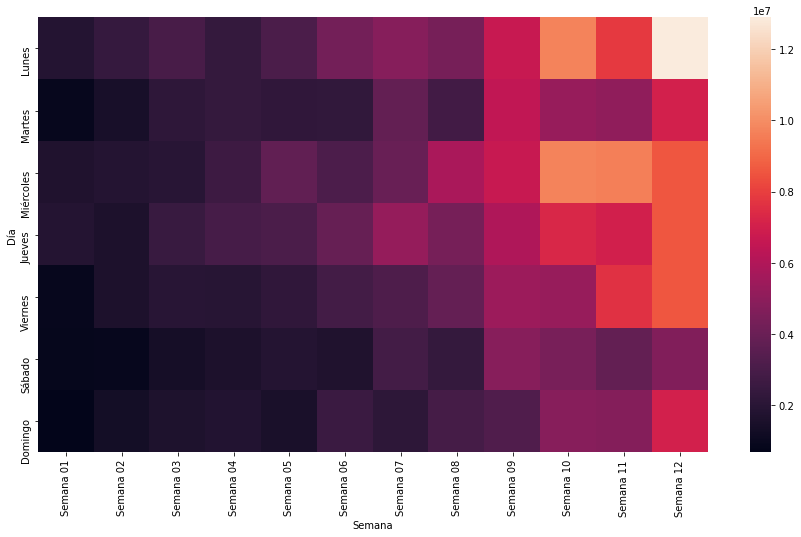

In [379]:
# plt.rcParams['figure.figsize'] permite específicar las dimensiones del gráfico creado
plt.rcParams['figure.figsize'] = (15.0, 8.0)

# sns.heatmap recibe el dataset indexado y crea un mapa de calor
ax = sns.heatmap(datavc)

### F. Mapa de Calor con Palette Divergente

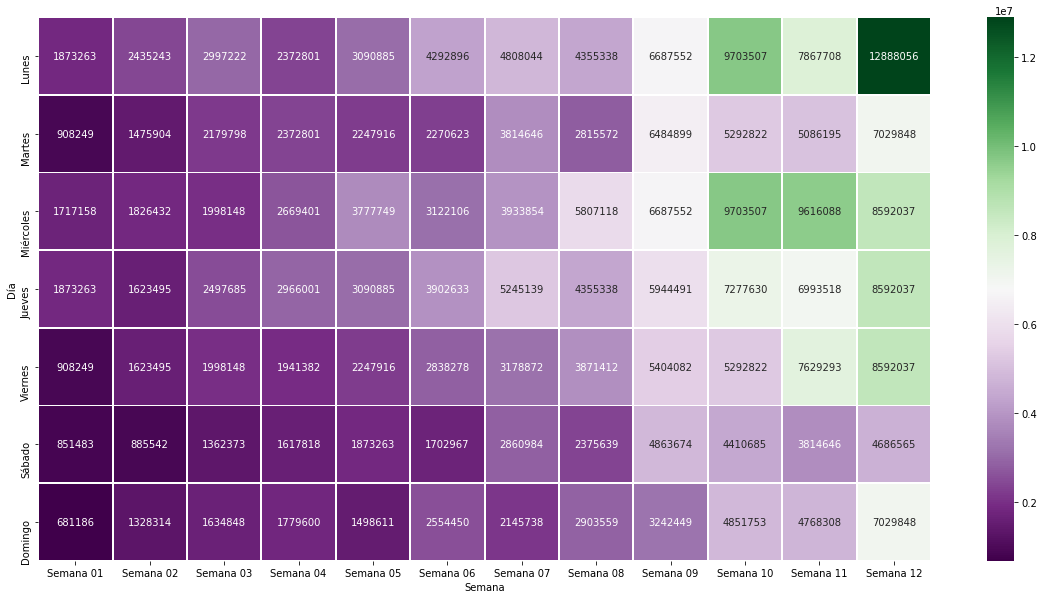

In [380]:
# plt.rcParams['figure.figsize'] permite específicar las dimensiones del gráfico creado
f, ax = plt.subplots(figsize=(20.0, 10.0))

# personalizamos nuestro mapa de calor:

# - annot específica si se escribe o no el valor en la celda
# - fmt específica el formato de escritura del valor (d para valores enteros)
# - linewidths para marcar espaciado entre las celdas
# - cmap para la secuencia de colores

sns.heatmap(datavc, annot=True, fmt="d", linewidths=0.9, ax=ax, cmap="PRGn")

### G. Mapa de Calor con Palette Secuencial

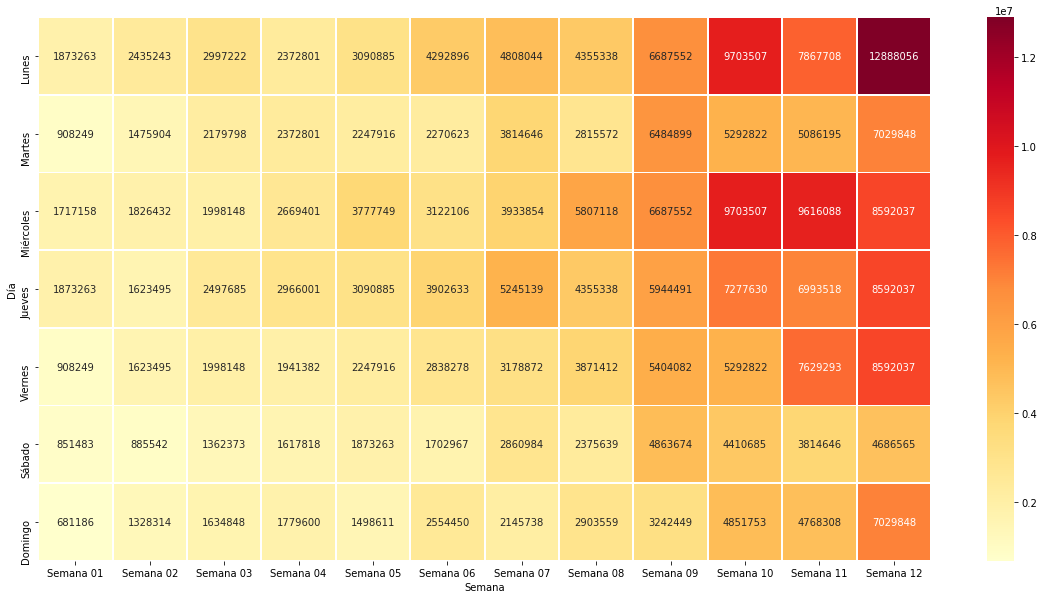

In [381]:
# plt.rcParams['figure.figsize'] permite específicar las dimensiones del gráfico creado
f, ax = plt.subplots(figsize=(20.0, 10.0))

# personalizamos nuestro mapa de calor:

# - annot específica si se escribe o no el valor en la celda
# - fmt específica el formato de escritura del valor (d para valores enteros)
# - linewidths para marcar espaciado entre las celdas
# - cmap para la secuencia de colores
sns.heatmap(datavc, annot=True, fmt="d", linewidths=0.9, ax=ax, cmap="YlOrRd")

### H. Pregunta: ¿Cuál paleta es más efectiva para codificar estos datos?

#### Como los datos ascienden durante el tiempo. Es mas adecuada una paleta sencuencial ya que este tipo de mapeo de color es apropiado cuando los datos varían desde valores relativamente bajos o poco interesantes hasta valores relativamente altos o interesantes.


In [382]:
### Referencia:
## links: https://seaborn.pydata.org/tutorial/color_palettes.html
## links 2: https://matplotlib.org/examples/color/colormaps_reference.html

## Caso 02 - Titanic

El hundimiento del Titanic fue uno de los sucesos más impactantes del siglo XX.

### Se requiere:

1. Implemente una visualización con gráfico de tipo torta usando matplotlib o pandas. El gráfico debe mostrar la proporción de pasajeros de cada clase. El título del gráfico de torta debe ser “Pasajeros del Titanic por clase”. Cambie la paleta de color por defecto que tiene este tipo de gráfico. 


2. Implemente una visualización con dos gráficos de tipo torta usando matplotlib o pandas. Cada gráfico debe mostrar la proporción de pasajeros de cada clase. El primer gráfico debe presentar dicha proporción para el caso de los no sobrevivientes, y el segundo para el caso de los sobrevivientes. El título de este gráfico debe ser: “Pasajeros del Titanic por Supervivencia (0/1) y por Clase (T/F/S)”.

### A. Importar librerías requeridas
En la siguiente casilla importaremos los módulos necesarias para crear las visualizaciones.

In [383]:
# Importamos el módulo pyploy de matplotlib y abreviarlo a plt
import matplotlib.pyplot as plt

# Importamos la librería pandas y abreviarlo a pd
import pandas as pd

### B. Cargar dataset
En esta ocasión, se provee de un dataset que especifica la proporción de pasajeros por clase (First, Second, Third) y cómo se distribuyeron estas clases considerando si sobrevivieron o no al naufragio.

In [384]:
# Utilizamos la función sns.load_dataset para cargar el archivo.
df_titanic = sns.load_dataset("titanic")

#visualizacion 5 primeras filas
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### C. Contar pasajeros ejercicio 1.


In [385]:
# utilizamos la funcion pandas.DataFrame.groupby para contar en nuestro dataset.
contar_pasajeros = df_titanic.groupby('class').count()
contar_pasajeros

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,216,216,216,186,216,216,216,214,216,216,175,214,216,216
Second,184,184,184,173,184,184,184,184,184,184,16,184,184,184
Third,491,491,491,355,491,491,491,491,491,491,12,491,491,491


### D. Dataset ejercicio 1.

In [386]:
# utilizamos la funcion pandas.DataFrame para crear nuestro dataset.
total_pasajeros = pd.DataFrame({'Clase': ['Primera Clase', 'Segunda Clase', 'Tercera Clase'],
                                'Pasajeros': [216, 184, 491]})
total_pasajeros

,Clase,Pasajeros
0,Primera Clase,216
1,Segunda Clase,184
2,Tercera Clase,491


### E. Visualización del Grafico 1.

Text(0.5, 1.0, 'Pasajeros del Titanic por clase')

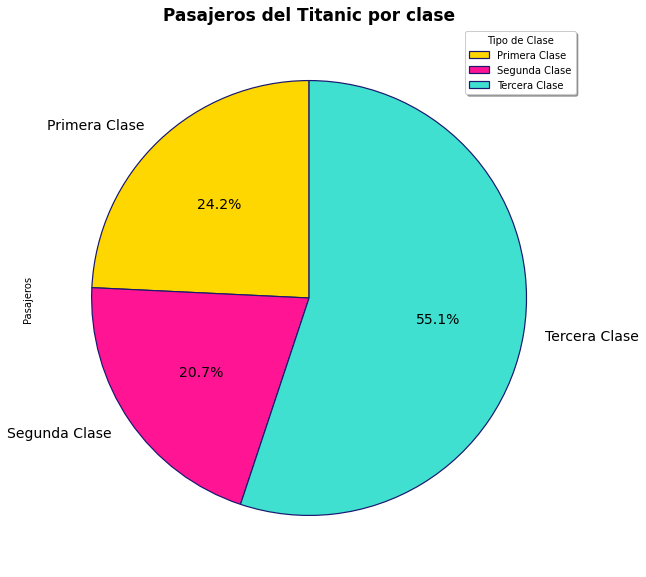

In [387]:
# Se crea una figura en matplotlib para poner el gráfico de tamaño 15x10  pulgadas
# Se crea un gráfico de torta con el método pie y se le entrega la lista de valores.
# En este caso el método retorna una lista con los diferentes objetos presentes en la visualización
# una lista de strings que será el nombre asignado a cada elemento.
total_pasajeros.groupby(['Clase']).sum().plot(kind="pie", 
                                              y='Pasajeros',  
                                              shadow = False,
                                              legend = False,
                                              startangle=90,
                                              figsize=(15,10), 
                                              explode = (0.0, 0.0, 0.0),
                                              textprops = dict(color ="black",fontsize = 14),
                                              wedgeprops = { "linewidth" : 1.2, "edgecolor" : "midnightblue" }  , 
                                              colors = ( "gold", "deeppink", "turquoise"),
                                              autopct="%1.1f%%")

# Se agrega la leyenda en donde se le entrega la listra de cada segmento circular.
plt.legend(('Primera Clase', 'Segunda Clase', 'Tercera Clase'), loc='upper right', 
                                                                shadow=True, 
                                                                title ="Tipo de Clase",
                                                                bbox_to_anchor =(0.5, 0, 0.5, 1))
#Se asigna un título al gráfico.
plt.title("Pasajeros del Titanic por clase", fontsize = 17, weight ="bold",x=0.5, y=1.0)

### F. Contar pasajeros ejercicio 2.

In [388]:
# utilizamos la funcion pandas.DataFrame.groupby para contar en nuestro dataset.
contar_sobrevivientes = df_titanic.groupby(["survived", "class"]).count()
contar_sobrevivientes

pclass  sex  age  sibsp  parch  fare  embarked  who  \
survived class                                                         
0        First       80   80   64     80     80    80        80   80   
         Second      97   97   90     97     97    97        97   97   
         Third      372  372  270    372    372   372       372  372   
1        First      136  136  122    136    136   136       134  136   
         Second      87   87   83     87     87    87        87   87   
         Third      119  119   85    119    119   119       119  119   

                 adult_male  deck  embark_town  alive  alone  
survived class                                                
0        First           80    58           80     80     80  
         Second          97     3           97     97     97  
         Third          372     6          372    372    372  
1        First          136   117          134    136    136  
         Second          87    13           87     87     87  
         Third          119     6          119    119    119

### G. Dataset ejercico 2.

In [389]:
tipo_sobreviviente = pd.DataFrame({'Clase': ['Primera Clase ', 'Segunda Clase', 'Tercera Clase'],
                                   'No Sobrevivientes': [80, 97, 372],
                                   'Sobrevivientes': [136, 87, 119]})
tipo_sobreviviente

,Clase,No Sobrevivientes,Sobrevivientes
0,Primera Clase,80,136
1,Segunda Clase,97,87
2,Tercera Clase,372,119


### H. Visualización del Grafico 2.

Text(0.5, 0.8, 'Pasajeros del Titanic por Supervivencia (0/1) y por Clase (T/F/S)')

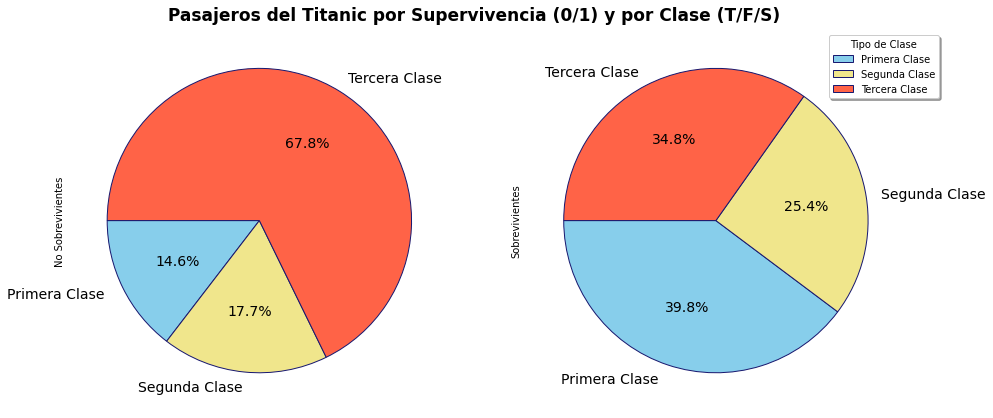

In [390]:
# Se crea una figura en matplotlib para poner el gráfico de tamaño 15x10  pulgadas
# Se crea un sub gráfico de torta con el método "Subplots" y se asigna True.
# En este caso el método retorna una lista con los diferentes objetos presentes en la visualización
# una lista de strings que será el nombre asignado a cada elemento
tipo_sobreviviente.groupby(["Clase"]).sum().plot(kind="pie", 
                                                 subplots=True, 
                                                 shadow = False,
                                                 legend = False,
                                                 startangle=180,
                                                 figsize=(15,10), 
                                                 explode = (0.0, 0.0, 0.0),
                                                 textprops = dict(color ="black",fontsize = 14),
                                                 wedgeprops = { "linewidth" : 1, "edgecolor" : "midnightblue" }, 
                                                 colors = ( "skyblue", "khaki", "tomato"),
                                                 autopct="%1.1f%%")

# Se agrega la leyenda en donde se le entrega la listra de cada segmento circular.
plt.legend(('Primera Clase', 'Segunda Clase', 'Tercera Clase'), loc='upper right', 
                                                                shadow=True, 
                                                                title ="Tipo de Clase",
                                                                bbox_to_anchor =(0.6, 0, 0.5, 1))
#Se asigna un sub título al gráfico.
plt.suptitle("Pasajeros del Titanic por Supervivencia (0/1) y por Clase (T/F/S)", fontsize = 17, 
                                                                                  x=0.5, y=0.8, 
                                                                                  weight ="bold")

### Pregunta: De los supervivientes, ¿cuál es la clase de pasajero más común?
#### Respuesta: Gracias al Grafico de Torta podemos identificar que del total de pasajeros "sobrevivientes" el mas común fué la Primera Clase con un 39.8%. 

### Pregunta 2: De los no supervivientes ¿cuál es la clase de pasajero más común? 
#### Respuesta: Gracias al Grafico de Torta podemos identificar que del total de pasajeros " no sobrevivientes" el mas común fué la Tercera Clase con un 67.8%. 

### Pregunta 3: ¿cree que este gráfico es más efectivo que un gráfico de barras para comparar categorías?
#### Respuesta: El Grafico de Torta es mas eficiente cuando las categorias a comparar son menor, a diferencia del de barras que sería mas efectivo con mas categorias a comparar.

In [391]:
### Referencia:
## https://matplotlib.org/3.1.0/gallery/color/named_colors.html
## https://kontext.tech/column/code-snippets/402/pandas-dataframe-plot-pie-chart
## https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/

## Caso 03 -  Peliculas
Durante los últimos años ha aumentado el interés de las personas por ir al cine a ver películas. Dado lo anterior, durante los años 2011 y 2019 se ha recopilado cuantas películas por género han sido estrenadas para poder determinar si hubo algún género más popular o no.

### Se requiere:

1. Un small multiple donde cada gráfico será uno de línea cuya categoría y color será definido según el género. Uno de los ejes será el año y el otro será la cantidad de películas estrenadas en dicho año y con ese género. Personalice la marca para que cada dato del gráfico de línea tenga un símbolo.


2. Un small multiple donde cada gráfico será uno de barra horizontal cuya categoría y color será definido según el año. Uno de los ejes será el género y el otro será la cantidad de películas.

### A. Importar librerías requeridas

En la siguiente casilla importaremos los módulos necesarias para crear las visualizaciones.

In [392]:
# Importamos el módulo pyploy de matplotlib y abreviarlo a plt
import matplotlib.pyplot as plt

# Importamos la librería pandas y abreviarlo a pd
import pandas as pd

# Importamos la librería pandas y abreviarlo a sns
import seaborn as sns

### B. Cargar dataset
En esta ocasión, Se provee un dataset tabular ("peliculas.csv") que especifica la cantidad de películas que han sido estrenada según su género principal y el año de estreno.

In [393]:
# Utilizamos la función read_csv para cargar el archivo.
dataset_peliculas = pd.read_csv("peliculas.csv")

#visualizacion 5 primeras filas
dataset_peliculas.head()

,género,año,cantidad
0,acción,2010,11
1,acción,2011,14
2,acción,2012,22
3,acción,2013,11
4,acción,2014,12


### D. Dataset

In [394]:
datapeli = dataset_peliculas.pivot(index="año", columns="género", values="cantidad")
datapeli

género,acción,animada,aventura,ciencia ficción,comedia,crimen,drama,guerras,mundo mágico,musical,oeste,romance,terror
año,,,,,,,,,,,,,
2010,11,26,11,18,12,11,27,16,3,12,23,8,8
2011,14,20,20,18,17,8,8,18,6,5,15,30,3
2012,22,0,15,6,18,13,11,19,13,24,9,14,26
2013,11,3,22,14,23,12,12,3,19,25,25,13,10
2014,12,3,21,5,22,5,13,12,24,10,23,22,6
2015,15,3,6,19,8,18,21,21,29,6,16,1,26
2016,20,27,11,10,15,10,21,8,30,15,19,0,10
2017,24,9,8,25,14,8,13,16,11,3,11,16,11
2018,22,13,13,24,21,25,5,20,22,15,8,2,20


### E. Grafico Multiple 1.

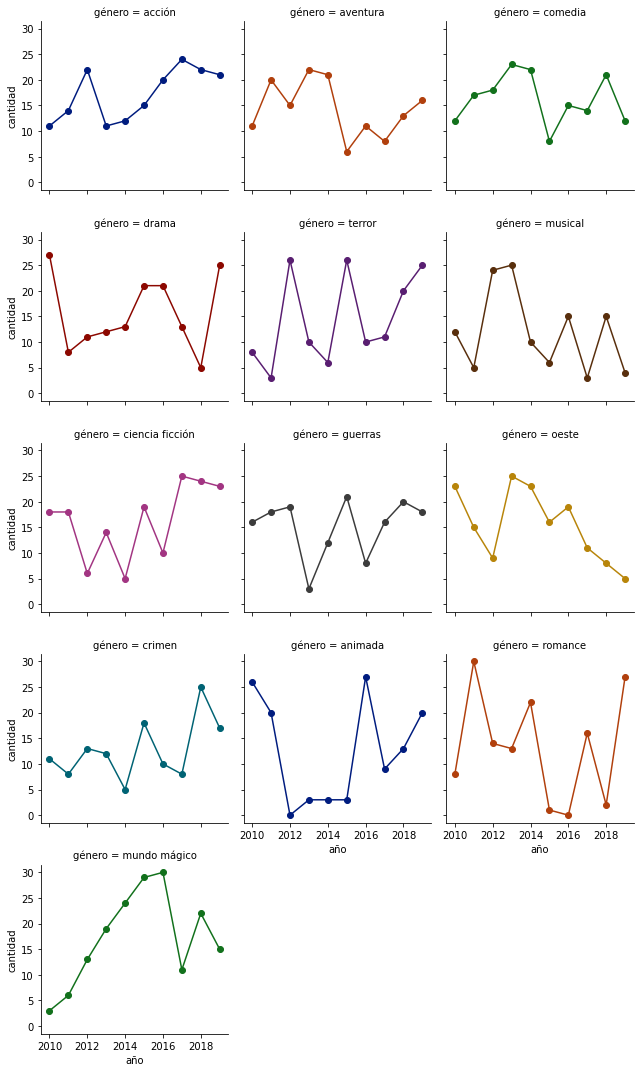

In [395]:
# Generar una grilla en donde los argumentos son:
# data=dataset_peliculas: indicar de donde provienen los datos
# col="género": indicar qué columna utilizar para definir cuantos gráficos hay
# hue="género": indicar qué columna utilizar para definir los colores de cada gráfico
# col_wrap=3: indicar cuantas columnas pueden haber.
# palette="dark" paleta de colores a utilizar.
grid = sns.FacetGrid(data=dataset_peliculas, col="género", hue="género", col_wrap=3, palette="dark")

# Llamamos al método map que se encarga de llenar cada gráfico de la grilla. Sus argumentos son:
# * plt.plot: indicar la forma con la que se llenará cada gráfico.  
# * "año": indicar qué columna utilizar como coordenada en el eje X.
# * "cantidad": indicar qué columna utilizar como coordenada en el eje Y.
# * marker="": indicar cómo se va a marcar cada punto del gráfico. En este caso utilizaremos "o"
grid.map(plt.plot, "año", "cantidad", marker="o")

#visualizacion del grafico.
plt.show()

### E. Grafico Multiple 2.

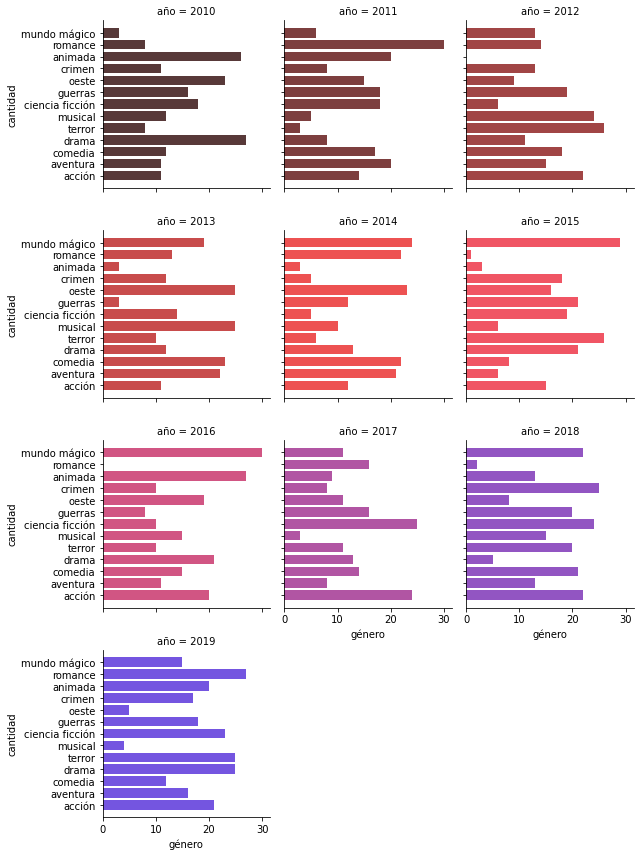

In [396]:
# Generar una grilla en donde los argumentos son:
# data=dataset_peliculas: indicar de donde provienen los datos
# col="año": indicar qué columna utilizar para definir cuantos gráficos hay
# hue="año": indicar qué columna utilizar para definir los colores de cada gráfico
# col_wrap=3: indicar cuantas columnas pueden haber.
# palette="seismic_d" paleta de colores a utilizar.
grid = sns.FacetGrid(data=dataset_peliculas, col="año", hue="año", col_wrap=3, palette="seismic_d")

# Llamamos al método map que se encarga de llenar cada gráfico de la grilla. Sus argumentos son:
# * plt.barh: indicar la forma con la que se llenará cada gráfico.  
# * "género": indicar qué columna utilizar como coordenada en el eje X.
# * "cantidad": indicar qué columna utilizar como coordenada en el eje Y.
grid.map(plt.barh, "género", "cantidad")

#visualizacion del grafico.
plt.show()

### Pregunta: ¿cuál de los dos gráficos permite comparar la tendencia de un género entre los diferentes años? 

#### Respuesta: El Grafico 1. Nos permite visualizacion mejor la tendencia en el tiempo ya que se esta definiendo "género" como Hue y columna a utilizar.

### Pregunta 2: ¿cual de los dos gráficos permite identificar el género de películas más estrenados en 1 año específico?

#### Respuesta: El Grafico 2. Nos permite identificar de mejor manera el genero de peliculas mas estrenados en un año especifico, ya que se esta definiendo "año" como Hue y columna a utilizar.


In [397]:
### Referencias:
## Link:https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f